## What You're Aiming For

In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods. 

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

## Instructions

#### Part1: supervised learning

- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Prepare your dataset for the modelling phase
- Apply Decision tree, and plot its ROC curve
- Try to improve your model performance by changing the model hyperparameters
#### Part2: unsupervised learning

- Drop out the target variable
- Apply K means clustering and plot the clusters
- Find the optimal K parameter
- Interpret the results

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting capabilities
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset (Mall Customer Segmentation Data)

data = pd.read_csv("Microsoft_malware_dataset_min.csv")

# Inspect the first few rows of the dataset to understand its structure
data.head(20)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
5,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,97
6,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,78
7,0,0.0,0.0,Core,1,1.0,0.0,1.0,rs1,97
8,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,164
9,1,1.0,0.0,CoreSingleLanguage,1,1.0,0.0,1.0,rs3,93


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HasDetections,100000.0,0.499280,0.500002,0.0,0.0,0.0,1.0,1.0
Wdft_IsGamer,96585.0,0.281607,0.449785,0.0,0.0,0.0,1.0,1.0
Census_IsVirtualDevice,99815.0,0.006642,0.081230,0.0,0.0,0.0,0.0,1.0
Census_HasOpticalDiskDrive,100000.0,0.075850,0.264759,0.0,0.0,0.0,0.0,1.0
Firewall,98924.0,0.977326,0.148863,0.0,1.0,1.0,1.0,1.0
SMode,94068.0,0.000351,0.018727,0.0,0.0,0.0,0.0,1.0
IsProtected,99609.0,0.944864,0.228246,0.0,1.0,1.0,1.0,1.0
CountryIdentifier,100000.0,108.188050,62.989406,1.0,51.0,97.0,162.0,222.0


In [6]:
data.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Microsoft_malware_dataset_min.csv")
profile.to_file("report.html")

profile.to_notebook_iframe()

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
numerical_features = data.select_dtypes(include='number').columns
numerical_features

Index(['HasDetections', 'Wdft_IsGamer', 'Census_IsVirtualDevice',
       'Census_HasOpticalDiskDrive', 'Firewall', 'SMode', 'IsProtected',
       'CountryIdentifier'],
      dtype='object')

In [9]:
len(numerical_features)

8

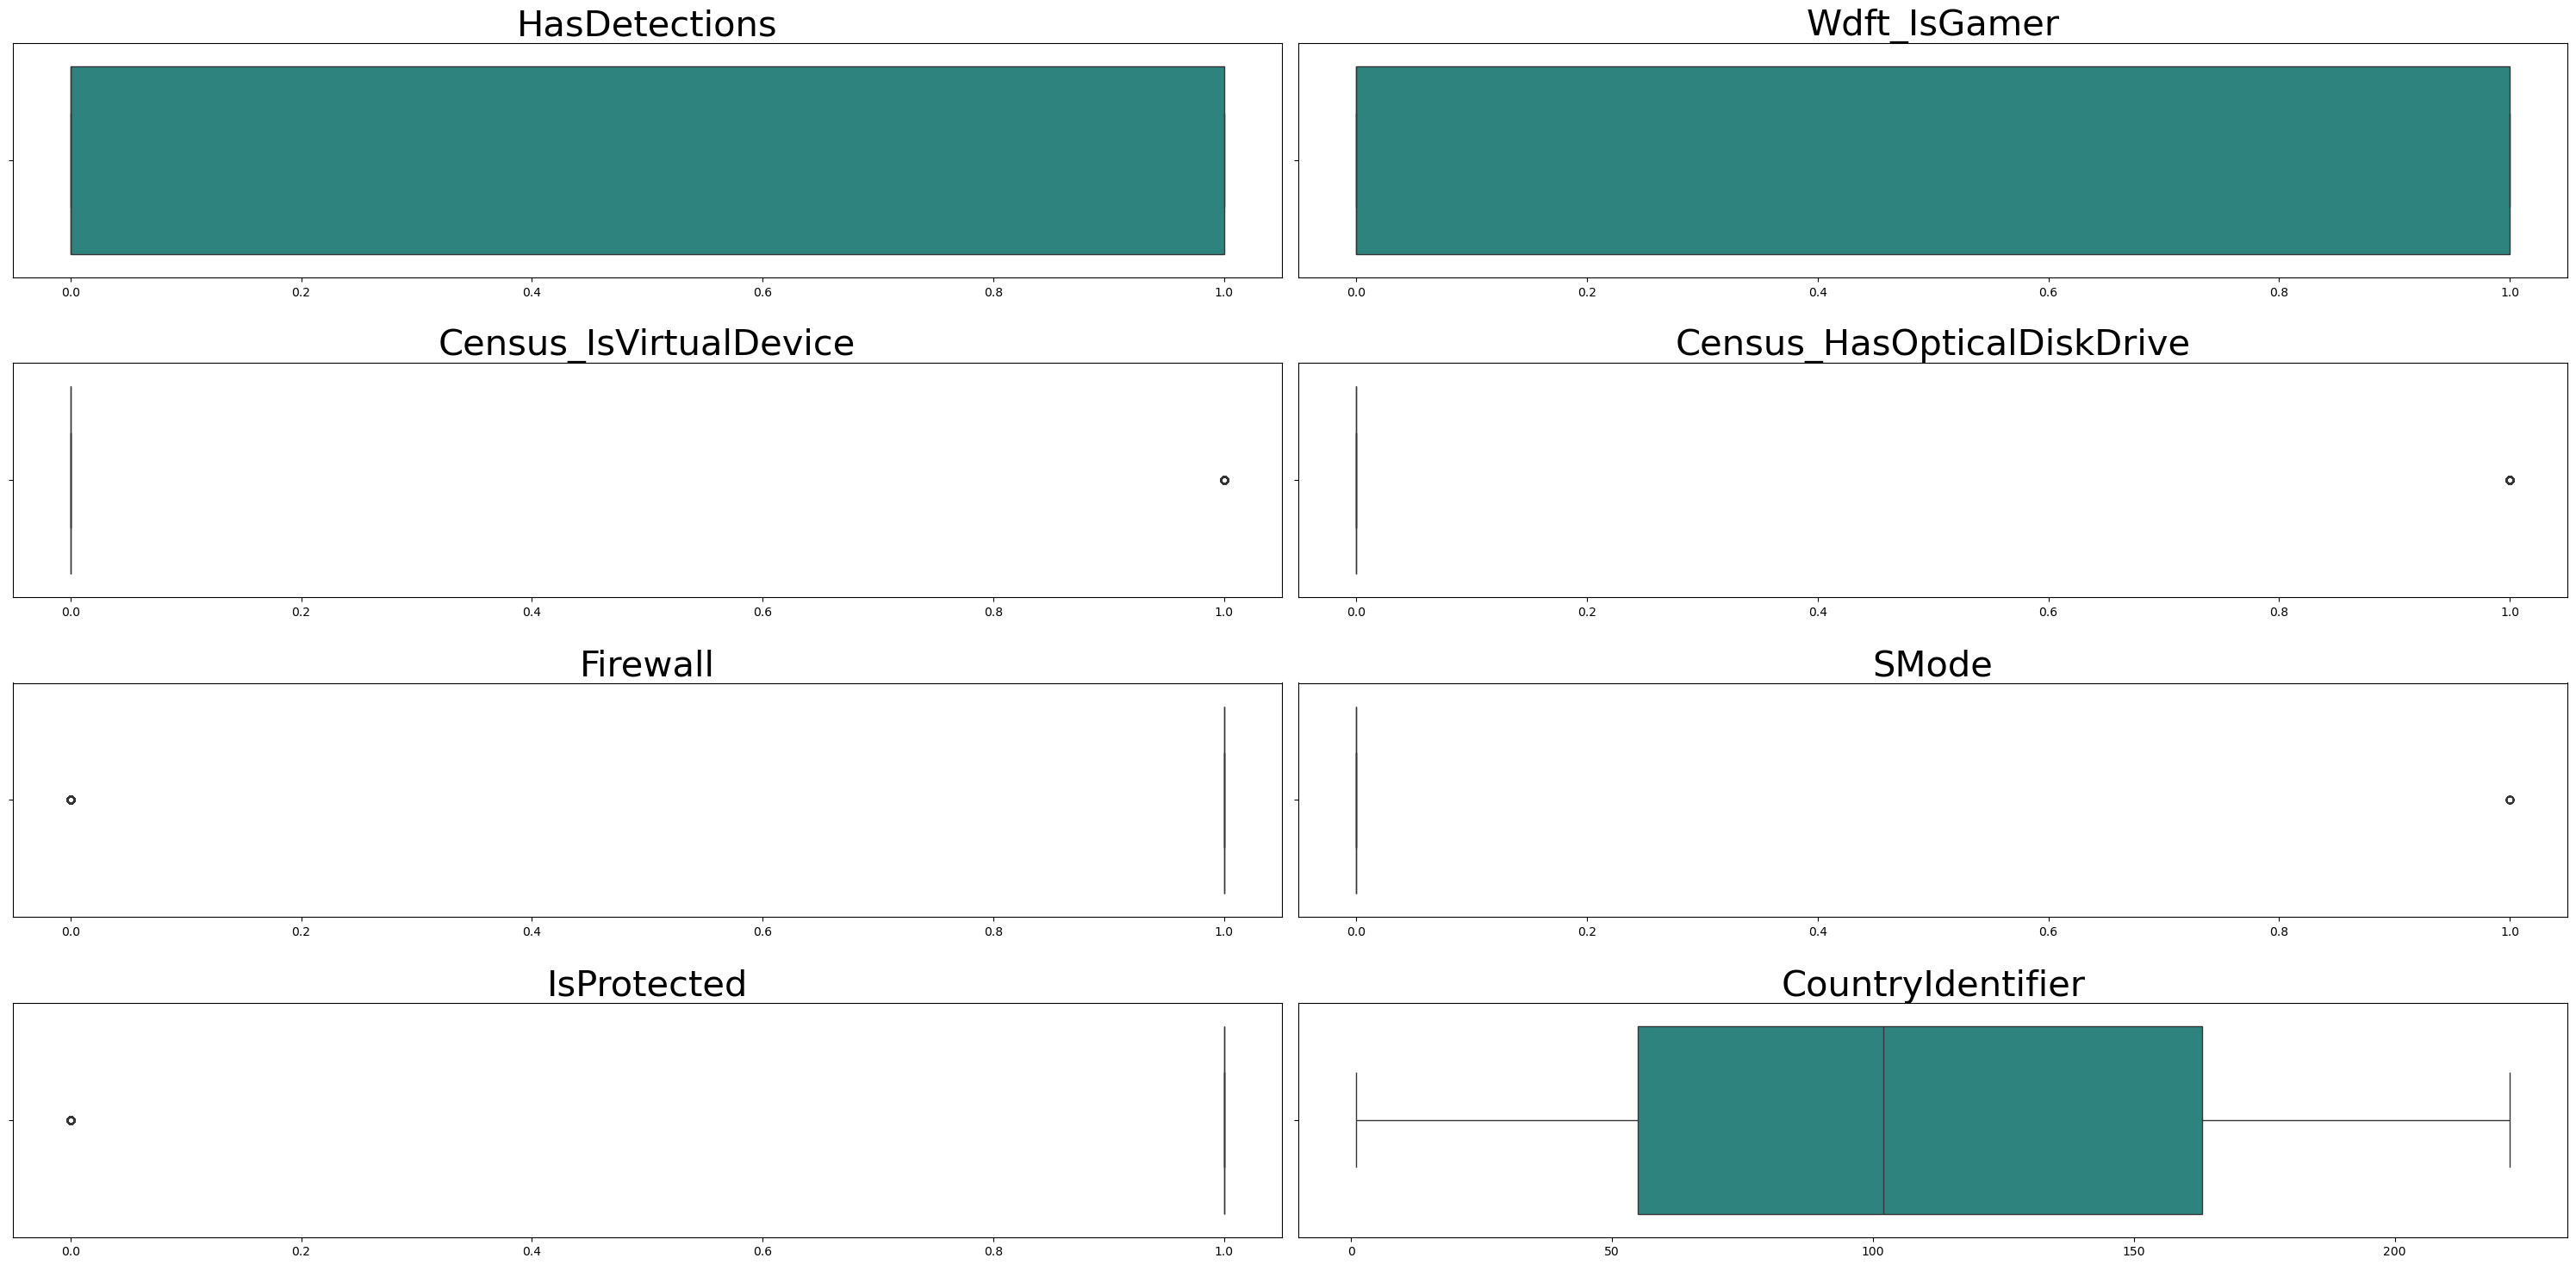

In [10]:
plt.figure(figsize=(30, 15))

# Adjust the number of rows and columns
for i in range(0, len(numerical_features)):
    plt.subplot(len(numerical_features) // 2 + len(numerical_features) % 2, 2, i + 1)  # 2 subplots per row
    sns.boxplot(x=data[numerical_features[i]], palette='viridis')
    plt.title(numerical_features[i], fontsize=30)
    plt.xlabel(' ')

# Display all subplots together
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


In [11]:
data.drop(['SMode','Census_IsVirtualDevice'], axis=1, inplace=True)

In [12]:
data.dropna(inplace = True)

In [13]:
df = data
df

,HasDetections,Wdft_IsGamer,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,Professional,0,1.0,1.0,rs4,29
1,0,0.0,Professional,0,1.0,1.0,rs4,93
2,0,0.0,Core,0,1.0,1.0,rs4,86
3,1,0.0,Professional,0,1.0,1.0,rs4,88
4,1,0.0,Core,0,1.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...
99918,0,0.0,Core,0,1.0,0.0,rs4,207
99926,0,1.0,Professional,0,1.0,0.0,rs4,115
99927,0,1.0,Core,1,1.0,1.0,rs4,142
99943,0,1.0,Core,1,1.0,1.0,rs4,214


In [14]:
label_encoder = LabelEncoder()
df['Census_OSEdition'] = label_encoder.fit_transform(df['Census_OSEdition'])

In [15]:
label_encoder = LabelEncoder()
df['OsPlatformSubRelease'] = label_encoder.fit_transform(df['OsPlatformSubRelease'])

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('HasDetections', axis=1)  # Features
y = df['HasDetections']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

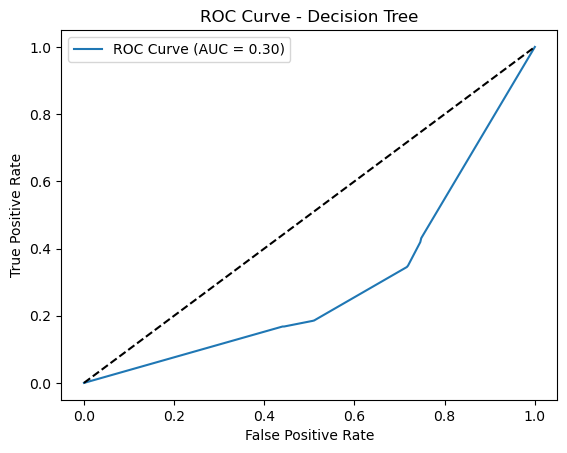

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Get prediction probabilities
y_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


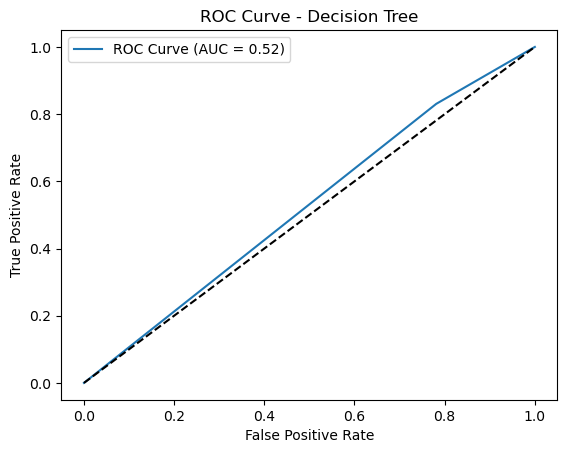

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42,          # For reproducibility
    max_depth=3,              # Set maximum depth of the tree
    min_samples_split=1.0,     # Minimum number of samples required to split an internal node
    min_samples_leaf=2,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # 'gini' for Gini impurity, or 'entropy' for information gain
)
dt_model.fit(X_train_scaled, y_train)

# Get prediction probabilities
y_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

In [33]:
X_scaled = scaler.fit_transform(X)

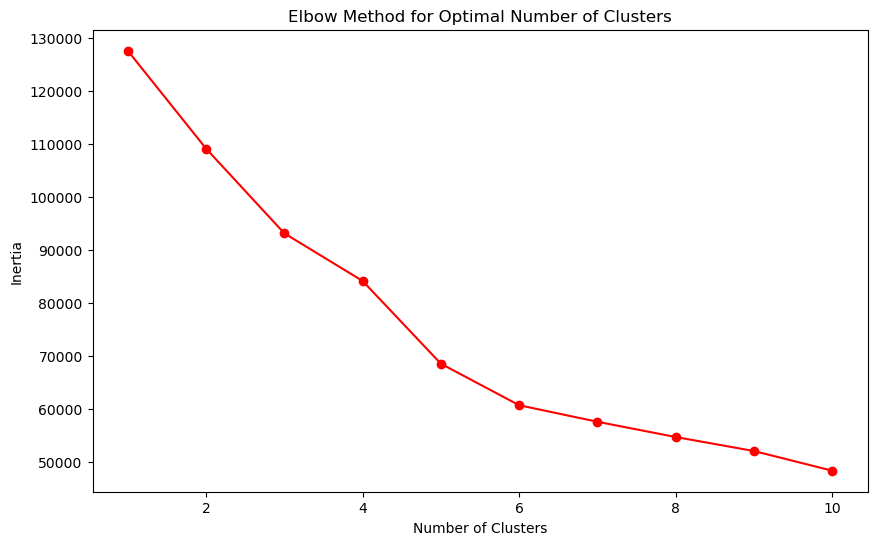

In [34]:
inertia = []  # List to store the inertia values for each number of clusters

for i in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans with the current number of clusters (i)
    kmeans.fit(X_scaled)  # Fit the KMeans model on the standardized data
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(range(1, 11), inertia, 'ro-')  # Plot the number of clusters against inertia with red markers and lines
# 'r': Specifies the color of the plot, in this case, red (r stands for red).
# 'o': Specifies the marker style, which in this case is a circle (o).
# '-': Specifies the line style, which in this case is a solid line (-).

plt.title('Elbow Method for Optimal Number of Clusters')  # Add a title to the plot
plt.xlabel('Number of Clusters')  # Label the x-axis as 'Number of Clusters'
plt.ylabel('Inertia')  # Label the y-axis as 'Inertia' (within-cluster sum of squares)
plt.show()  # Display the plot

In [35]:
kmeans = KMeans(n_clusters=6, random_state=42)  # Initialize the KMeans algorithm with 5 clusters and a fixed random state for reproducibility
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

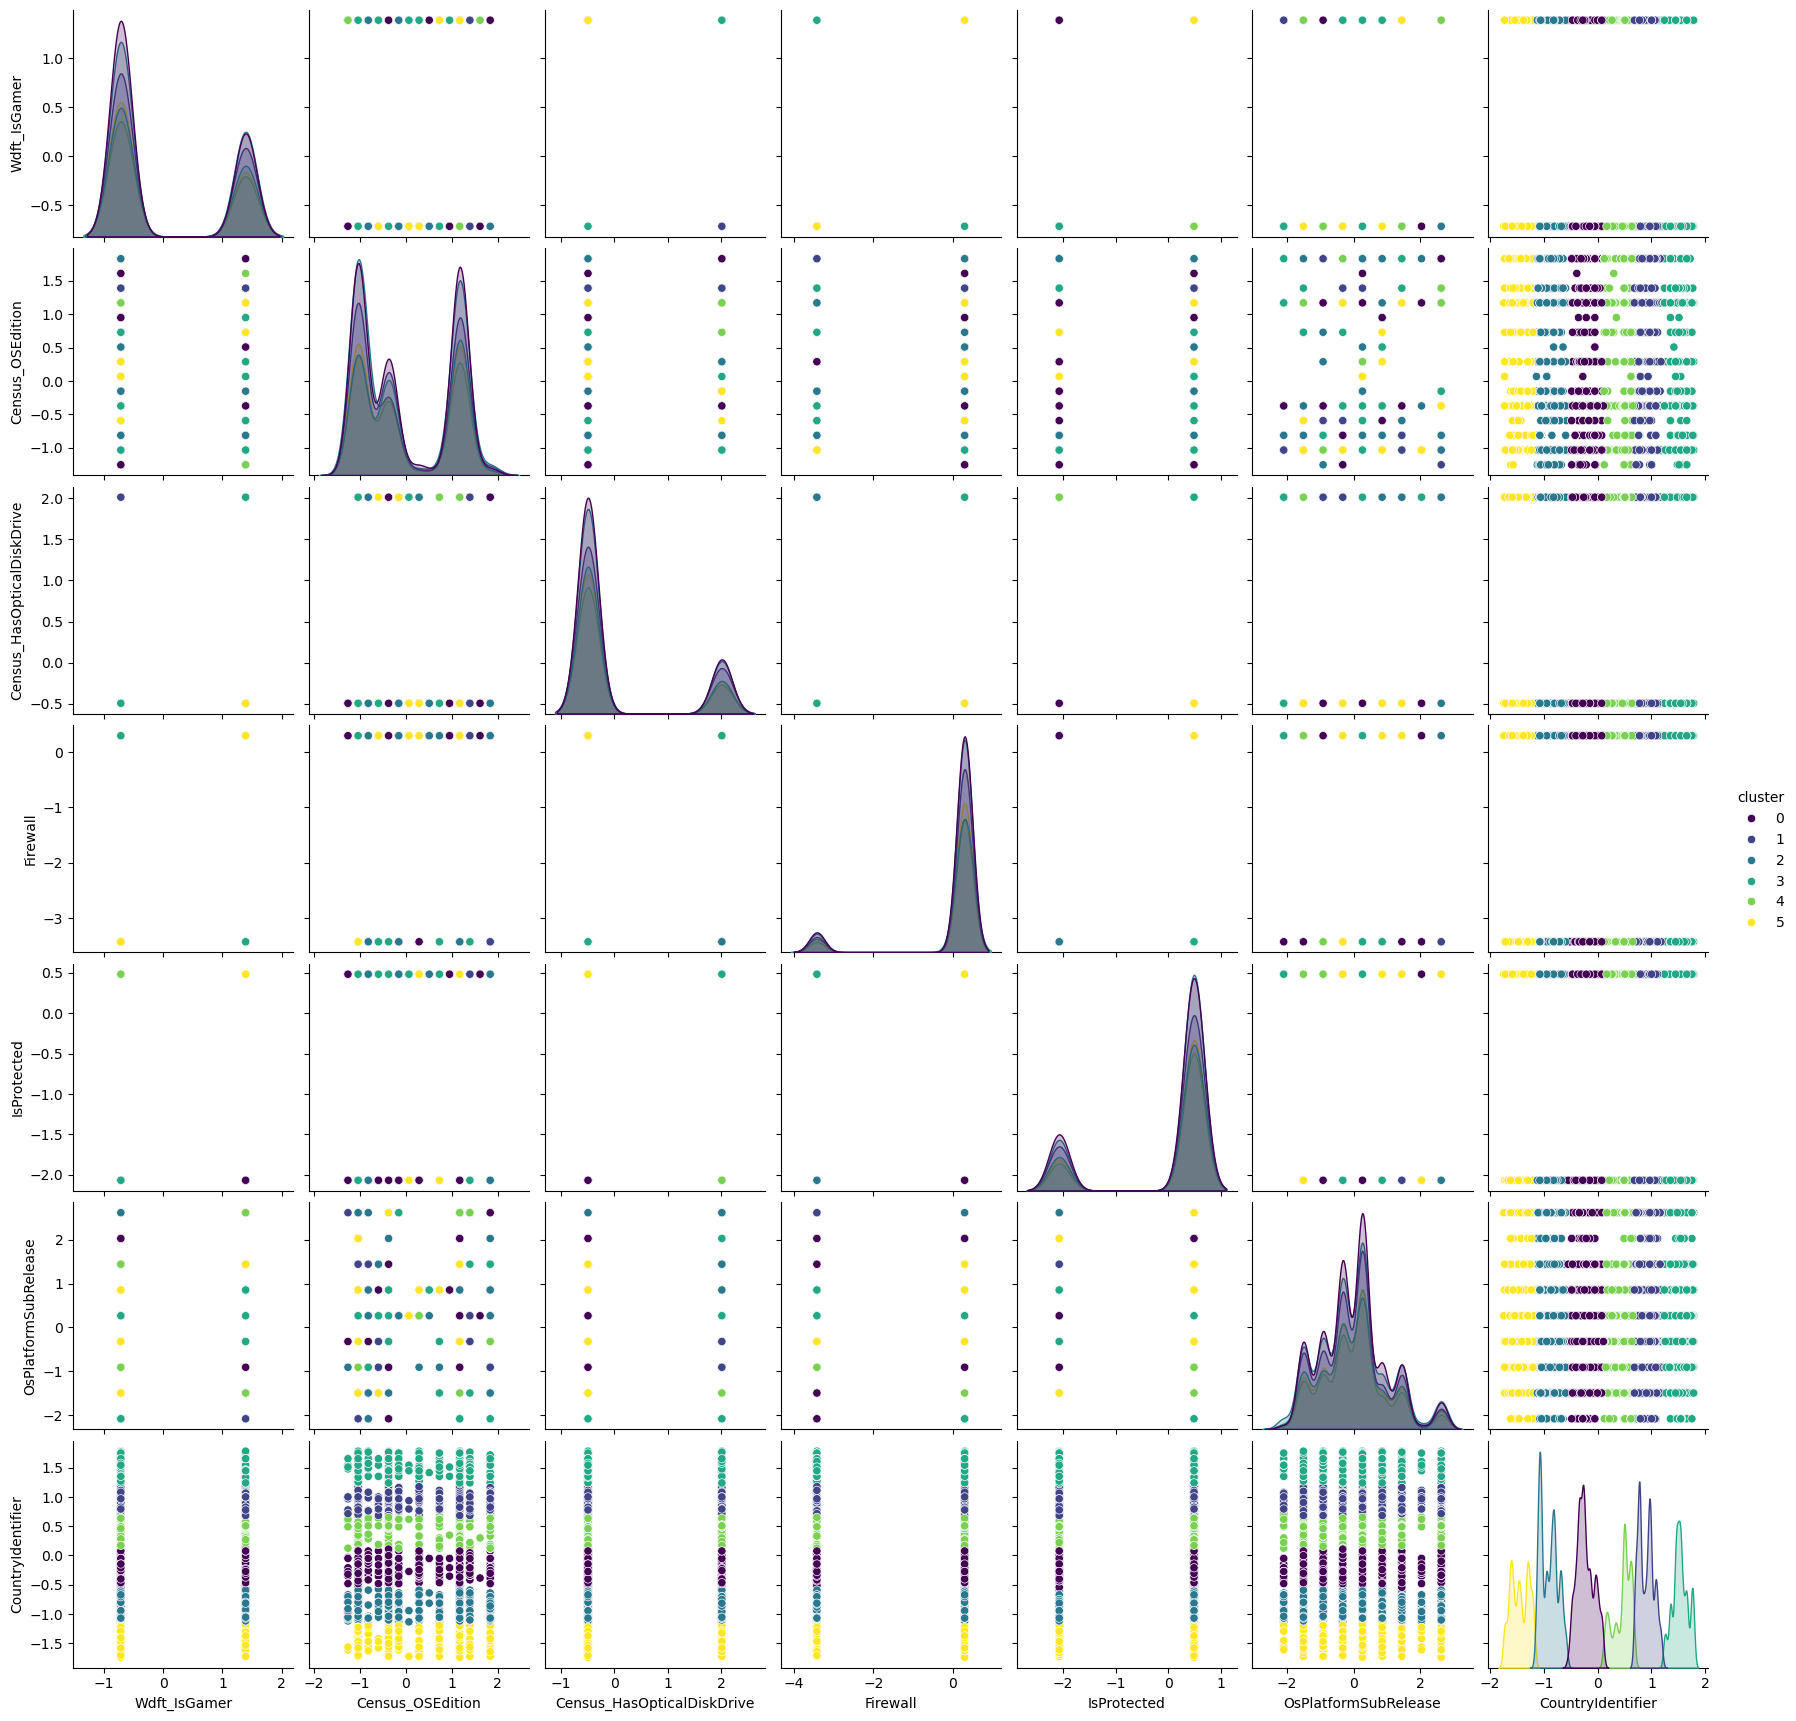

In [42]:
import seaborn as sns
import pandas as pd

# Assuming X_scaled is a DataFrame or a scaled numpy array, and 'kmeans.labels_' contains the cluster labels
# Add cluster labels to the DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['Wdft_IsGamer', 'Census_OSEdition', 'Census_HasOpticalDiskDrive', 
                                              'Firewall', 'IsProtected', 'OsPlatformSubRelease', 'CountryIdentifier'])

# Add the cluster labels to the DataFrame
X_scaled_df['cluster'] = kmeans.labels_

# Pair plot with clusters
sns.pairplot(X_scaled_df, hue='cluster', palette='viridis', diag_kind='kde')



## Interpretation of the Results: 
Analyze the clusters by reviewing the centroids and how the data points are distributed in each cluster.

In [43]:
print("Cluster Centers:\n", kmeans.cluster_centers_)
df['cluster'].value_counts()

Cluster Centers:
 [[3.23722149e-01 5.70825688e+00 2.00786370e-01 9.16120577e-01
  7.90825688e-01 3.55439056e+00 9.55328965e+01]
 [3.51851852e-01 5.60954175e+00 2.14375392e-01 9.23728814e-01
  7.98807282e-01 3.50156937e+00 1.66478657e+02]
 [3.49918434e-01 5.68243611e+00 2.03915171e-01 9.20337140e-01
  8.09679173e-01 3.54268624e+00 5.33825449e+01]
 [3.54752852e-01 5.88060837e+00 1.81749049e-01 9.10646388e-01
  8.12927757e-01 3.56692015e+00 2.06061977e+02]
 [3.43124734e-01 5.58237548e+00 1.86462324e-01 9.29757344e-01
  8.34397616e-01 3.55512984e+00 1.38508727e+02]
 [3.22304399e-01 5.70611133e+00 1.89567925e-01 9.30712339e-01
  8.30284157e-01 3.57103931e+00 1.93413780e+01]]


cluster
0    3815
2    3678
1    3186
3    2630
5    2569
4    2349
Name: count, dtype: int64